In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import numpy as np

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 351s 2us/step


(50000, 32, 32, 3)

In [4]:
len(X_train)

50000

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

In [8]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [9]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [10]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [11]:
y_train[0]

array([6], dtype=uint8)

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [13]:
y_train = y_train.reshape(-1,) # converts 2D to 1D
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [14]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

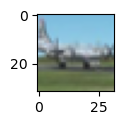

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5,1))
plt.imshow(X_train[1999])

In [16]:
y_train[1999]  

0

In [17]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [18]:
def plot_sample(X, y, index):
    plt.figure(figsize = (10,1))
    plt.imshow(X[index]) 
    plt.xlabel(classes[y[index]])

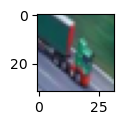

In [19]:
plt.figure(figsize = (10,1))
plt.imshow(X_train[50])

In [20]:
y_train[50]

9

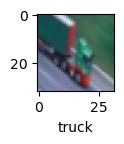

In [21]:
plot_sample(X_train, y_train, 50)

In [22]:
y_train[10]

4

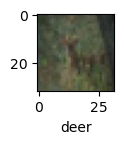

In [23]:
plot_sample(X_train, y_train, 10)

# Normalizing the training data

In [24]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [25]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [29]:
X_train.shape

(50000, 32, 32, 3)

In [30]:
cnn = models.Sequential([
    
    #feature extraction
    #kernel_size= filter/detector size 
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)), # (28,28,1)
    layers.MaxPooling2D(2, 2),
    
     layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    #classification 
    # dimension conversion
    layers.Flatten(),
    
    #input layer , no of nodes for hidden layer 1= 200
    layers.Dense(200, activation='sigmoid'),
    
    #hidden layer 1, no of nodes for hidden layer 2 =100
    layers.Dense(100, activation='sigmoid'),
    
    #hidden layer 2, outcomes= 10(0-9 classes)
    layers.Dense(10, activation='sigmoid')
])

In [31]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5551 - accuracy: 0.4310
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1808 - accuracy: 0.5798
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0289 - accuracy: 0.6377
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9201 - accuracy: 0.6749
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8311 - accuracy: 0.7076
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7502 - accuracy: 0.7358
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6786 - accuracy: 0.7641
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6094 - accuracy: 0.7886
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5447 - accuracy: 0.8114
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.486

In [33]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9846 - accuracy: 0.6850


[0.9845790266990662, 0.6850000023841858]

In [34]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.39878141e-02, 2.75174379e-02, 1.07483603e-01, 9.92174745e-01,
        2.60899931e-01, 9.68063474e-01, 5.41707948e-02, 8.78707040e-03,
        2.01225374e-02, 1.86196286e-02],
       [8.96915019e-01, 9.86136615e-01, 1.32015478e-02, 2.05997750e-02,
        3.12190177e-03, 4.07523056e-03, 1.36496243e-03, 3.10629141e-04,
        9.97130096e-01, 9.24337029e-01],
       [7.48854816e-01, 8.21189344e-01, 1.45357763e-02, 6.62644356e-02,
        1.55403567e-02, 4.88059362e-03, 4.05613659e-03, 8.35134275e-03,
        9.62222457e-01, 8.81940782e-01],
       [9.66140866e-01, 1.88502595e-02, 2.87902594e-01, 1.11991644e-01,
        4.14404035e-01, 4.17113537e-03, 7.86903873e-02, 5.51385339e-03,
        7.65278637e-01, 2.91730519e-02],
       [2.16943980e-03, 1.57801877e-03, 8.13587129e-01, 8.79935622e-01,
        9.92411315e-01, 2.15901449e-01, 9.57673013e-01, 2.25653835e-02,
        2.00108183e-03, 1.59600028e-03]], dtype=float32)

In [35]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 8, 8, 0, 4, 6, 1, 6, 3, 1]

In [36]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

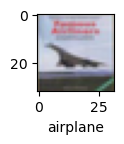

In [37]:
 plot_sample(X_test, y_test,3)

In [38]:
classes[y_classes[3]]

'airplane'

In [39]:
from sklearn.metrics import  classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.68      0.72      1000
           1       0.82      0.80      0.81      1000
           2       0.64      0.48      0.55      1000
           3       0.49      0.51      0.50      1000
           4       0.60      0.64      0.62      1000
           5       0.61      0.57      0.59      1000
           6       0.69      0.80      0.74      1000
           7       0.72      0.75      0.73      1000
           8       0.78      0.81      0.79      1000
           9       0.72      0.81      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000

